# PRÀCTICA 2 - CLASSIFICACIÓ

1597487 | Manuel Arnau Fernández

1600123 | Alba Fernández Coronado

1605547 | Marina Palomar González

In [1]:
# Carregant les llibreries necessàries
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import collections as col
import scipy.stats as stats
import statsmodels.api as sm
import scipy.stats
import random as rand
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import LabelEncoder, StandardScaler, scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, HuberRegressor, RANSACRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import warnings
import time
from yellowbrick.target import FeatureCorrelation

warnings.filterwarnings("ignore")


In [2]:
# Obrint el dataset
dataset = pd.read_csv('./weatherAUS.csv')
print(f'Mida de les dades: {dataset.shape}')
dataset.info()
dataset.head()

Mida de les dades: (145460, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


No     75.839406
Yes    21.914616
Name: RainTomorrow, dtype: float64
Número NaNs:  3267


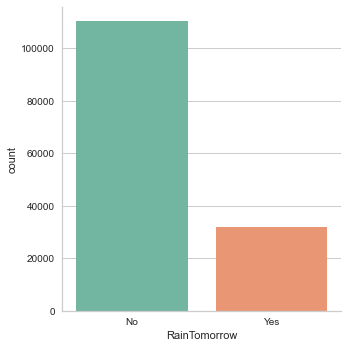

In [3]:
#Target: variable objectiu
Y = dataset['RainTomorrow']

Y.nunique() #quants tipus de valors hi ha: 2
Y.unique() #quins són els valors únics: 0, 1
print(Y.value_counts()/len(Y)*100) #percentatge de cada resposta
print("Número NaNs: ",Y.isnull().sum()) #Numero NaNs
sns.catplot(x = 'RainTomorrow', data = dataset, kind = "count", palette='Set2')


No     75.841468
Yes    21.916678
Name: RainToday, dtype: float64
Número NaNs:  3261


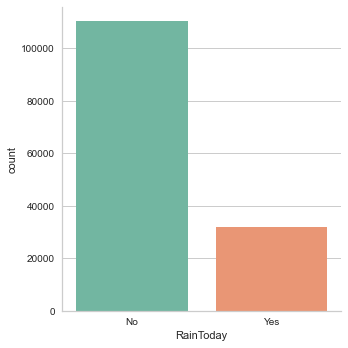

In [4]:
#Variable RainToday
T = dataset['RainToday']

T.nunique() #quants tipus de valors hi ha: 2
T.unique() #quins són els valors únics: 0, 1
print(T.value_counts()/len(Y)*100) #percentatge de cada resposta
print("Número NaNs: ",T.isnull().sum()) #Numero NaNs
sns.catplot(x = 'RainToday', data = dataset, kind = "count", palette='Set2')

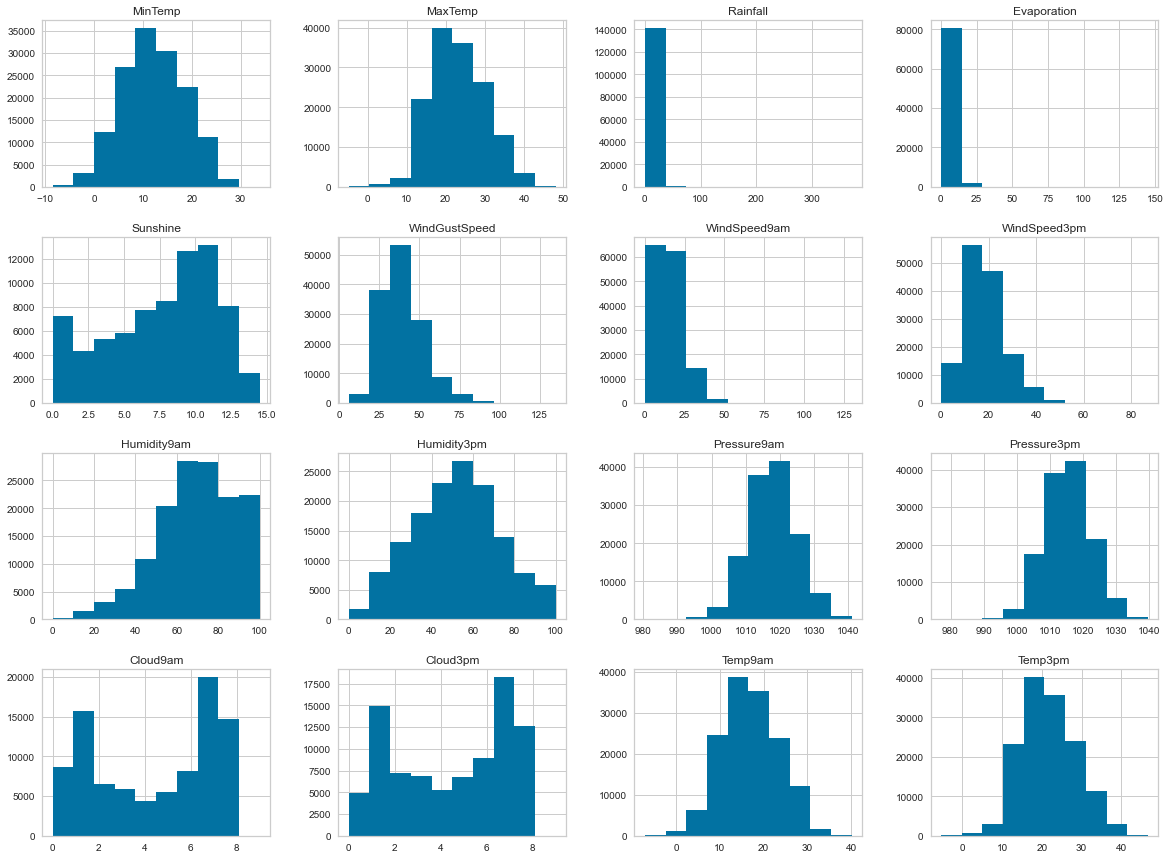

In [5]:
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
dataset.hist(ax=ax)
plt.show()

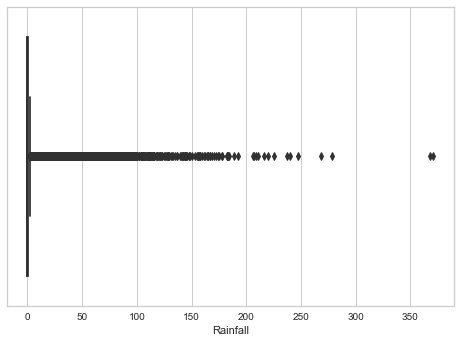

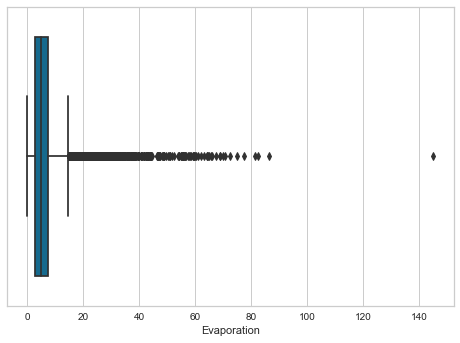

In [6]:
#Variable Rainfall
sns.boxplot(dataset['Rainfall'])
plt.show()

#Variable Evaporation
sns.boxplot(dataset['Evaporation'])
plt.show()

#Hi ha NaNs que s'hauran de tractar

In [7]:
#sns.pairplot(dataset[dataset.select_dtypes(exclude=['object']).columns], hue = 'RainTomorrow')

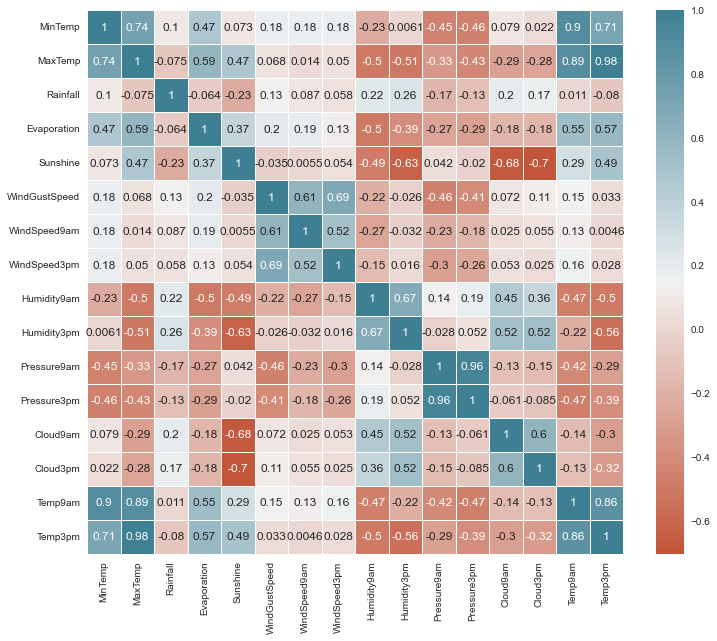

In [8]:
# Estudi de la correlació entre els atributs
correlacio = dataset.corr()
plt.figure(figsize=(12,10))
ax = sns.heatmap(correlacio, annot=True, linewidths=.5, cmap = sns.diverging_palette(20, 220, n=200))

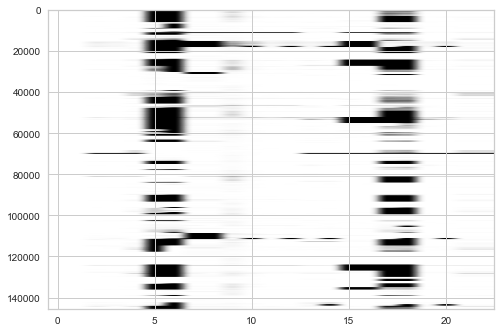

In [9]:
current_cmap = matplotlib.cm.get_cmap()
current_cmap.set_bad(color='red')
plt.imshow(dataset.isna(),aspect = 'auto')
# aquestes dues columnes mb tant de nans es poden eliminar pq no ens produeixen informació, segurament, 
# les seves mesures estan preses per una estació meteorologica està espatllada

In [10]:
idx = dataset.index[dataset.isnull().sum(axis=1)>8].tolist()
dataset.drop(idx,axis=0)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [11]:
#Fem una copia del dataset
dataset_cp = dataset.copy()
#Eliminem les files que ocntinguin NaNs a la variable resposta
dataset_cp = dataset_cp[dataset_cp['RainTomorrow'].notna()]
# Mirem el percentatge de NanNs de cada variable
print((dataset_cp.isnull().sum()/len(dataset_cp))*100)
#eliminem les columnes amb percentatges alts de NaNs
dataset_cp = dataset_cp.drop(['Evaporation'], axis=1)
dataset_cp = dataset_cp.drop(['Sunshine'], axis=1)
dataset_cp = dataset_cp.drop(['Cloud9am'], axis=1)
dataset_cp = dataset_cp.drop(['Cloud3pm'], axis=1)
#omplim les columnes amb un percentatge mes baix amb la moda dels valors nulls de la columna
dataset_cp['MinTemp'].fillna(dataset_cp['MinTemp'].mode()[0], inplace=True)
dataset_cp['MaxTemp'].fillna(dataset_cp['MaxTemp'].mode()[0], inplace=True)
dataset_cp['Rainfall'].fillna(dataset_cp['Rainfall'].mode()[0], inplace=True)
dataset_cp['WindGustDir'].fillna(dataset_cp['WindGustDir'].mode()[0], inplace=True)
dataset_cp['WindGustSpeed'].fillna(dataset_cp['WindGustSpeed'].mode()[0], inplace=True)
dataset_cp['WindDir9am'].fillna(dataset_cp['WindDir9am'].mode()[0], inplace=True)
dataset_cp['WindDir3pm'].fillna(dataset_cp['WindDir3pm'].mode()[0], inplace=True)
dataset_cp['WindSpeed9am'].fillna(dataset_cp['WindSpeed9am'].mode()[0], inplace=True)
dataset_cp['WindSpeed3pm'].fillna(dataset_cp['WindSpeed3pm'].mode()[0], inplace=True)
dataset_cp['Humidity9am'].fillna(dataset_cp['Humidity9am'].mode()[0], inplace=True)
dataset_cp['Humidity3pm'].fillna(dataset_cp['Humidity3pm'].mode()[0], inplace=True) 
dataset_cp['Pressure9am'].fillna(dataset_cp['Pressure9am'].mode()[0], inplace=True)
dataset_cp['Pressure3pm'].fillna(dataset_cp['Pressure3pm'].mode()[0], inplace=True)
dataset_cp['Temp9am'].fillna(dataset_cp['Temp9am'].mode()[0], inplace=True)
dataset_cp['Temp3pm'].fillna(dataset_cp['Temp3pm'].mode()[0], inplace=True)
dataset_cp['RainToday'].fillna(dataset_cp['RainToday'].mode()[0], inplace=True)
# Es transformes totes les dades a numeriques
dataset_cp['Year'] = dataset_cp['Date'].str.split("-", n=1).str[0].astype("int")
dataset_cp['Month'] = dataset_cp['Date'].str.split("-", n=2).str[1].astype("int")
dataset_cp['Day'] = dataset_cp['Date'].str.split("-", n=3).str[2].astype("int")
dataset_cp = dataset_cp.drop(['Date'], axis=1)
dataset_cp = pd.concat([dataset_cp, pd.get_dummies(dataset_cp.RainToday, drop_first=True, prefix='RainToday')], axis=1)
dataset_cp = dataset_cp.drop(['RainToday'], axis=1)
dataset_cp = pd.concat([dataset_cp, pd.get_dummies(dataset_cp.RainTomorrow, drop_first=True, prefix='RainTomorrow')], axis=1)
dataset_cp = dataset_cp.drop(['RainTomorrow'], axis=1)
le = LabelEncoder()
dataset_cp['Location'] = le.fit_transform(dataset_cp['Location'])
dataset_cp['WindGustDir'] = le.fit_transform(dataset_cp['WindGustDir'])
dataset_cp['WindDir9am'] = le.fit_transform(dataset_cp['WindDir9am'])
dataset_cp['WindDir3pm'] = le.fit_transform(dataset_cp['WindDir3pm'])


dataset_cp.info()

Date              0.000000
Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
RainTomorrow      0.000000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Location          142193 non-null  int32  
 1   MinTemp           142193 non-null  float64
 2   MaxTemp           142193 non-null  float64
 3   Rainfall

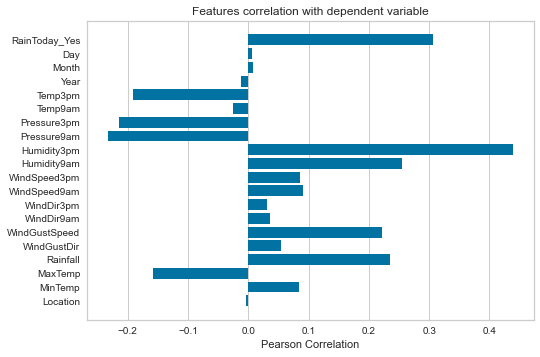

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [12]:
# Correlacio dels atributs amb la variable objectiu
X = dataset_cp.drop(['RainTomorrow_Yes'], axis=1)
Y = dataset_cp['RainTomorrow_Yes']
feature_names = list(X.columns)
visualizer = FeatureCorrelation(labels = feature_names)
visualizer.fit(X, Y)
visualizer.poof()


In [13]:
NoObj_data = dataset_cp[dataset_cp.select_dtypes(exclude=['object']).columns]

In [14]:
NoObj_data

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_Yes,RainTomorrow_Yes
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,2008,12,1,0,0
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,2008,12,2,0,0
2,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,2008,12,3,0,0
3,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,...,16.0,1017.6,1012.8,18.1,26.5,2008,12,4,0,0
4,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,...,33.0,1010.8,1006.0,17.8,29.7,2008,12,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,41,3.5,21.8,0.0,0,31.0,2,0,15.0,13.0,...,27.0,1024.7,1021.2,9.4,20.9,2017,6,20,0,0
145455,41,2.8,23.4,0.0,0,31.0,9,1,13.0,11.0,...,24.0,1024.6,1020.3,10.1,22.4,2017,6,21,0,0
145456,41,3.6,25.3,0.0,6,22.0,9,3,13.0,9.0,...,21.0,1023.5,1019.1,10.9,24.5,2017,6,22,0,0
145457,41,5.4,26.9,0.0,3,37.0,9,14,9.0,9.0,...,24.0,1021.0,1016.8,12.5,26.1,2017,6,23,0,0


In [15]:
NoObj_data.describe()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_Yes,RainTomorrow_Yes
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,...,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,23.740655,12.174813,23.219477,2.326738,8.059039,39.659350,7.000316,7.788485,13.954569,18.533303,...,51.495742,1017.530193,1015.281978,16.987588,21.654889,2012.758926,6.402544,15.715084,0.221213,0.224181
std,14.237503,6.391258,7.111209,8.426426,4.694267,13.195878,4.514678,4.546322,8.864344,8.754566,...,20.532227,6.756591,6.682175,6.472166,6.874665,2.541256,3.426506,8.798150,0.415065,0.417043
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,980.500000,977.100000,-7.200000,-5.400000,2007.000000,1.000000,1.000000,0.000000,0.000000
25%,11.000000,7.600000,17.900000,0.000000,4.000000,31.000000,3.000000,4.000000,7.000000,13.000000,...,37.000000,1013.500000,1011.000000,12.300000,16.700000,2011.000000,3.000000,8.000000,0.000000,0.000000
50%,24.000000,12.000000,22.600000,0.000000,9.000000,37.000000,7.000000,8.000000,13.000000,17.000000,...,52.000000,1016.700000,1015.500000,16.800000,20.900000,2013.000000,6.000000,16.000000,0.000000,0.000000
75%,36.000000,16.800000,28.200000,0.600000,13.000000,46.000000,11.000000,12.000000,19.000000,24.000000,...,65.000000,1021.800000,1019.400000,21.500000,26.300000,2015.000000,9.000000,23.000000,0.000000,0.000000
max,48.000000,33.900000,48.100000,371.000000,15.000000,135.000000,15.000000,15.000000,130.000000,87.000000,...,100.000000,1041.000000,1039.600000,40.200000,46.700000,2017.000000,12.000000,31.000000,1.000000,1.000000


In [16]:
MiceImputed = NoObj_data.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(NoObj_data)

# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.05)
Q3 = MiceImputed.quantile(0.95)
IQR = Q3 - Q1
total_outlier_num = ((NoObj_data < (Q1 - 1.5 * IQR)) | (NoObj_data > (Q3 + 1.5 * IQR))).sum()
print(total_outlier_num)

# Removing outliers from the dataset
dataset_cp = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset_cp.shape

Location               0
MinTemp                0
MaxTemp                0
Rainfall            1875
WindGustDir            0
WindGustSpeed          3
WindDir9am             0
WindDir3pm             0
WindSpeed9am           4
WindSpeed3pm           7
Humidity9am            0
Humidity3pm            0
Pressure9am            0
Pressure3pm            0
Temp9am                0
Temp3pm                0
Year                   0
Month                  0
Day                    0
RainToday_Yes          0
RainTomorrow_Yes       0
dtype: int64


(140308, 21)

In [17]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


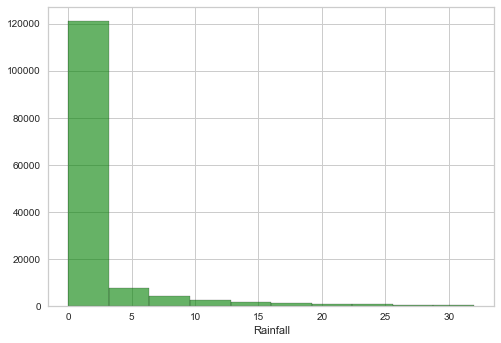

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

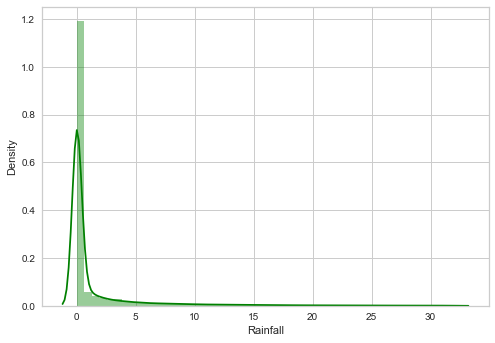

In [18]:
plt.hist(dataset_cp['Rainfall'], color= 'green', edgecolor = 'black', alpha = 0.6)
plt.xlabel('Rainfall')
plt.show()

sns.distplot(dataset_cp['Rainfall'], color= 'green')

In [19]:
dataset_cp.describe()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_Yes,RainTomorrow_Yes
count,140308.000000,140308.000000,140308.000000,140308.000000,140308.000000,140308.000000,140308.000000,140308.000000,140308.000000,140308.000000,...,140308.000000,140308.000000,140308.000000,140308.000000,140308.000000,140308.000000,140308.000000,140308.000000,140308.000000,140308.000000
mean,23.743443,12.112861,23.222816,1.598468,8.056547,39.549691,6.984484,7.785337,13.899314,18.500713,...,51.185713,1017.602705,1015.343086,16.957692,21.660888,2012.760085,6.415842,15.713095,0.210801,0.217835
std,14.240183,6.381394,7.123600,4.272897,4.696151,13.108127,4.514925,4.547731,8.806723,8.721007,...,20.405874,6.723214,6.655902,6.478434,6.886653,2.541074,3.420659,8.795200,0.407878,0.412776
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,982.000000,977.100000,-7.200000,-5.400000,2007.000000,1.000000,1.000000,0.000000,0.000000
25%,11.000000,7.600000,17.900000,0.000000,4.000000,31.000000,3.000000,4.000000,7.000000,13.000000,...,37.000000,1013.600000,1011.100000,12.300000,16.700000,2011.000000,3.000000,8.000000,0.000000,0.000000
50%,24.000000,11.900000,22.600000,0.000000,9.000000,37.000000,7.000000,8.000000,13.000000,17.000000,...,52.000000,1016.700000,1015.500000,16.700000,20.900000,2013.000000,6.000000,16.000000,0.000000,0.000000
75%,36.000000,16.700000,28.200000,0.600000,13.000000,46.000000,11.000000,12.000000,19.000000,24.000000,...,65.000000,1021.900000,1019.500000,21.500000,26.300000,2015.000000,9.000000,23.000000,0.000000,0.000000
max,48.000000,33.900000,48.100000,32.000000,15.000000,130.000000,15.000000,15.000000,74.000000,72.000000,...,100.000000,1041.000000,1039.600000,40.200000,46.700000,2017.000000,12.000000,31.000000,1.000000,1.000000


In [20]:
X = dataset_cp.drop(['RainTomorrow_Yes'], axis=1)
Y = dataset_cp['RainTomorrow_Yes']

In [21]:
#Normalitzem les dades
scaler = StandardScaler()
X_scale = pd.DataFrame(scaler.fit_transform(X))
X_cols = X.columns
X_scale.columns = X_cols

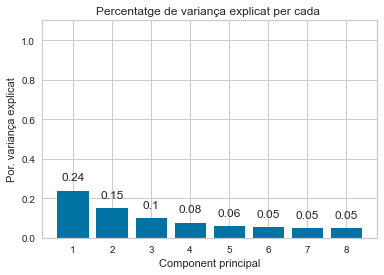

In [22]:
#es fa un pca per visualitzar els outliers
model = PCA(n_components=8)
model.fit(X_scale)
data_pca = pd.DataFrame(
    data = model.components_,
    columns = X.columns,
    index = ['PC1','PC2','PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
X_pca = model.transform(X_scale)

# Percentatge de variança de cada component
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(model.n_components_) + 1,
    height = model.explained_variance_ratio_
)

for x, y in zip(np.arange(len(data_pca.columns)) + 1, model.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(model.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Percentatge de variança explicat per cada ')
ax.set_xlabel('Component principal')
ax.set_ylabel('Por. variança explicat');

#Conclusió: com les variances són molt baixes, no val la pens afer un PCA.

#### Model Selection

In [23]:
#Separem en train i test
x_train,x_test,y_train,y_test = train_test_split(X_scale,Y,test_size=0.3, random_state = 0)

In [24]:
#Fem feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor

def BWSelection_VIF(Xtrain):
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = Xtrain.columns
    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(Xtrain.values, i)
                              for i in range(len(Xtrain.columns))]

    #si el valor de VIF és molt alt, hi ha molta correlacio entre variables
    if max(vif_data["VIF"]) > 5:
        X_new = Xtrain.drop(vif_data['feature'][np.argmax(vif_data["VIF"])],axis=1)
        BWSelection_VIF(X_new)
    else:
        llista.append(Xtrain.columns)

In [25]:
llista =[]
BWSelection_VIF(X_scale)
llista[0]

Index(['Location', 'MinTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Year', 'Month', 'Day',
       'RainToday_Yes'],
      dtype='object')

In [26]:
from sklearn.metrics import accuracy_score
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
t0=time.time()
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(x_train[llista[0]],y_train)
y_pred = clf_dt.predict(x_test[llista[0]])
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)


Accuracy : 0.7804147958092794
Time taken : 0.7357840538024902


In [ ]:
#Fer Logistic Regression, KNN i SVM (aquests dos tarden molt en temps)

In [ ]:
#SVM (Support Vector Machine)
from sklearn import svm
model = svm.SVC() #classificació
model.fit(x_train[['Humidity3pm']], y_train)
y_pred = model.predict(x_test[['Humidity3pm']])
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)